In [7]:
import pandas as pd
dataset = pd.read_csv('diabetes.csv')

# dataset.head(10)
# data = dataset.values
# print(len(data))

train, test = data[:614], data[614:]
# print(len(train),len(test), len(data))

from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler
X=data[:,0:8]
Y=data[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)  
            

print( X_test)

scaler=StandardScaler().fit(X_train)              
X_train=scaler.transform(X_train)
scaler=StandardScaler().fit(X_test)              
X_test=scaler.transform(X_test) 

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))

print("No of correct predictions = ",accuracy_score(y_test, y_pred)*len(X_test))

[[  3.    128.     72.    ...  32.4     0.549  27.   ]
 [  4.    114.     65.    ...  21.9     0.432  37.   ]
 [  0.    135.     68.    ...  42.3     0.365  24.   ]
 ...
 [ 12.    106.     80.    ...  23.6     0.137  44.   ]
 [  6.    117.     96.    ...  28.7     0.157  30.   ]
 [  1.    120.     80.    ...  38.9     1.162  41.   ]]
[[86 16]
 [22 30]]
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       102
         1.0       0.65      0.58      0.61        52

   micro avg       0.75      0.75      0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154

No of correct predictions =  116.0


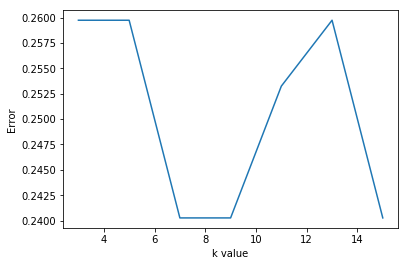

In [6]:
#knn for many values of k
import numpy as np
import matplotlib.pyplot as plt
knn = np.arange(3,17,2)
err = []
for k in knn:
    classifier = KNeighborsClassifier(n_neighbors=k)  
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    err.append(1-accuracy_score(y_test, y_pred))

plt.plot(knn, err)
plt.xlabel("k value")
plt.ylabel("Error")
plt.show()